# <u>Submission instructions</u>
### Submission in pairs unless otherwise authorized
<ul style="font-size: 17px">
<li> This notebook contains all the questions. You should follow the instructions below.</li>
<li> Solutions for both theoretical and practical parts should be provided in this notebook</li>
</ul>

<h3> Moodle submission</h3>


<p style="font-size: 17px">
You should submit three files:
</p>
<ul style="font-size: 17px">
<li>IPYNB notebook:
  <ul>
  <li>All the wet and dry parts, including code, graphs, discussion, etc.</li>
  </ul>
</li>
<li>PDF file:
  <ul>
  <li>Export the notebook to PDF. Make sure that all the cells are visible.</li>
  </ul>
</li>
<li>Pickle files:
  <ul>
    <li>As requested in Q3.2.a and Q4.a</li>
  </ul>
</li>
</ul>
<p style="font-size: 17px">
All files should be in the following format: "HW1_ID1_ID2.file"
<br>
Good Luck!
</p>

# Question 1 (15pt)

We mentioned in the lecture and tutorial that neural networks, thanks to their non-linear activation functions, can express a much wider range of functions than just linear ones. 

In each of the following exercises, you are given the weight matrices, biases and activations of a small neural network. Express the network's output as a simplified, well-known mathematical function and provide a short explanation. There is no need to prove correctness, an intuitive explanation is enough.

The activation function (non-linearity) is denoted as $g$. The output is given by: 

$$s = W_2 g(W_1 x + b_1) + b_2.$$ 

In network 4, we also apply the activation to the final output, meaning the network's output is $g(s)$. When not stated otherwise, the bias vector is 0.

### Network 1

$$x \in \mathbb{R}. \quad W_1=\begin{pmatrix} 1 \\ -1\end{pmatrix}, W_2 = \begin{pmatrix} 1 & 1\end{pmatrix}. \quad g=\text{ReLU}.$$

### Solution:
s = W2 · g(W1 · x + b1) + b2

**Hidden layer:**

W1 · x + b1  = (1, -1)ᵀ · x + (0, 0)ᵀ  = (x, -x)

Apply ReLU elementwise:

g(W1 · x + b1) = (max(0, x), max(0, -x))

**Output layer:**

s = (1, 1) · (max(0, x), max(0, -x)) + 0  = max(0, x) + max(0, -x)

Now check the two cases:

- If x ≥ 0: max(0, x) = x and max(0, -x) = 0 ⇒ s = x  
- If x < 0: max(0, x) = 0 and max(0, -x) = -x ⇒ s = -x  

So in both cases s is the absolute value of x.

**Conclusion:**  
The network implements the function

s = |x|  (the absolute value of x).

### Network 2

$$x \in \mathbb{R}^2. \quad W_1 = \begin{pmatrix}-1 & 1 \\ 1 & 0 \\ -1 & 0\end{pmatrix}, W_2 = \begin{pmatrix}1 \\ 1 \\ -1\end{pmatrix}. \quad g=\text{ReLU}.$$

## Network 2 - Solution

#### 1. Hidden layer calculation: $W_1 x$

We first compute the linear transformation into the hidden layer:

$$
W_1 x
=
\begin{pmatrix}
-1 & 1 \\
1 & 0 \\
-1 & 0
\end{pmatrix}
\begin{pmatrix}
x_1 \\
x_2
\end{pmatrix}
=
\begin{pmatrix}
-1 \cdot x_1 + 1 \cdot x_2 \\
1 \cdot x_1 + 0 \cdot x_2 \\
-1 \cdot x_1 + 0 \cdot x_2
\end{pmatrix}
=
\begin{pmatrix}
-x_1 + x_2 \\
x_1 \\
- x_1
\end{pmatrix}.
$$

Let

$$
z = W_1 x =
\begin{pmatrix}
z_1 \\
z_2 \\
z_3
\end{pmatrix}
=
\begin{pmatrix}
-x_1 + x_2 \\
x_1 \\
- x_1
\end{pmatrix}.
$$



#### 2. Hidden layer activation: $h = g(z) = \mathrm{ReLU}(z)$

ReLU is applied elementwise:

$$
h = g(z) = \mathrm{ReLU}(z) =
\begin{pmatrix}
\max(0, z_1) \\
\max(0, z_2) \\
\max(0, z_3)
\end{pmatrix}
=
\begin{pmatrix}
\max(0, -x_1 + x_2) \\
\max(0, x_1) \\
\max(0, -x_1)
\end{pmatrix}.
$$

So the hidden layer output is

$$
h =
\begin{pmatrix}
h_1 \\
h_2 \\
h_3
\end{pmatrix}
=
\begin{pmatrix}
\max(0, -x_1 + x_2) \\
\max(0, x_1) \\
\max(0, -x_1)
\end{pmatrix}
$$


#### 3. Output layer: $s = W_2^\top h$

Now we compute the scalar output $s$:

$$
s = W_2^\top h
=
\begin{pmatrix}
1 & 1 & -1
\end{pmatrix}
\begin{pmatrix}
h_1 \\
h_2 \\
h_3
\end{pmatrix}
= 1 \cdot h_1 + 1 \cdot h_2 - 1 \cdot h_3
$$

Substitute $h_1, h_2, h_3$:

$$
s =
\max(0, -x_1 + x_2)
+ \max(0, x_1)
- \max(0, -x_1)
$$

So far we have

$$
s(x_1, x_2)
=
\max(0, -x_1 + x_2)
+ \max(0, x_1)
- \max(0, -x_1)
$$



### 4. Simplification

Use the identity

$$
\max(0, x_1) - \max(0, -x_1) = x_1,
$$

which holds for any real $x_1$.

Therefore:

$$
s
= \max(0, -x_1 + x_2)
+ \big[ \max(0, x_1) - \max(0, -x_1) \big]
= \max(0, -x_1 + x_2) + x_1
$$

Note that $-x_1 + x_2 = x_2 - x_1$, so:

$$
s = x_1 + \max(0, x_2 - x_1)
$$

Now consider two cases:

- If $x_2 \le x_1$, then $x_2 - x_1 \le 0$, so $\max(0, x_2 - x_1) = 0$ and
  $$
  s = x_1
  $$
- If $x_2 > x_1$, then $x_2 - x_1 > 0$, so $\max(0, x_2 - x_1) = x_2 - x_1$ and
  $$
  s = x_1 + (x_2 - x_1) = x_2
  $$

In both cases, $s$ is the larger of $x_1$ and $x_2$, so:

$$
s(x_1, x_2) = \max(x_1, x_2)
$$


### Final Answer

The network computes the **maximum function** of its two inputs:

$$
\boxed{s(x_1, x_2) = \max(x_1, x_2)}
$$

**Intuition:**  
The hidden layer constructs $\max(0, x_2 - x_1)$ (active only when $x_2 > x_1$) and also reconstructs $x_1$ via the combination $\max(0, x_1) - \max(0, -x_1)$. Adding these terms yields the larger of $x_1$ and $x_2$.



### Network 3

$$x=\begin{pmatrix}x_1 \\ x_2 \\ y_1 \\ y_2\end{pmatrix} \in \mathbb{R}^4. \quad W_1 = \begin{pmatrix} 1 & 0 & -1 & 0 \\ -1 & 0 & 1 & 0 \\ 0 & 1 & 0 & -1 \\ 0 & -1 & 0 & 1\end{pmatrix}, W_2 = \begin{pmatrix} 1 & 1 & 1 & 1 \end{pmatrix}. \quad g = \text{ReLU}.$$

### Solution: 
**Hidden layer:**

W1 · x =
( x1 - y1,
  -x1 + y1,
  x2 - y2,
  -x2 + y2 )ᵀ

Apply ReLU elementwise:

g(W1 · x) =
( max(0, x1 - y1),
  max(0, y1 - x1),
  max(0, x2 - y2),
  max(0, y2 - x2) )ᵀ

**Output:**

s = W2 · g(W1 · x) + b2  
  = max(0, x1 - y1) + max(0, y1 - x1)
    + max(0, x2 - y2) + max(0, y2 - x2)

For any real number a, we have:
max(0, a) + max(0, -a) = |a|.

Using this identity:

s = |x1 - y1| + |x2 - y2|

**Conclusion:**  
Network 3 outputs the L1 (Manhattan) distance between the points (x1, x2) and (y1, y2):

s = |x1 - y1| + |x2 - y2|.

### Network 4 

Here, the non-linearity is applied also to the output of the second layer. For simplicity, assume $ \forall x \ge 10, \text{sigmoid}(x) = 1, \text{sigmoid}(-x) = 0$.

$$x \in \{0, 1\}^2 \quad \text{(binary vector)}.$$ 

$$W_1 = \begin{pmatrix} 20 & 20 \\ -20 & -20 \end{pmatrix}, b_1 = \begin{pmatrix} -10 \\ 30 \end{pmatrix}, W_2 = \begin{pmatrix} 20 & 20 \end{pmatrix}, b_2 = -30. \quad g=\text{sigmoid}.$$

## Network 4 - Solution

### 1. Hidden layer pre-activation: $z = W_1 x + b_1$

Let $x = (x_1, x_2)^\top$ , Then:
$$
z =
\begin{pmatrix}
z_1 \\
z_2
\end{pmatrix}
=
W_1 x + b_1
=
\begin{pmatrix}
20 & 20 \\
-20 & -20
\end{pmatrix}
\begin{pmatrix}
x_1 \\
x_2
\end{pmatrix}
+
\begin{pmatrix}
-10 \\
30
\end{pmatrix}
$$

Compute each component:
$$
z_1 = 20 x_1 + 20 x_2 - 10 = 20(x_1 + x_2) - 10
$$
$$
z_2 = -20 x_1 - 20 x_2 + 30 = 30 - 20(x_1 + x_2)
$$

Since $x_1, x_2 \in \{0,1\}$, the sum $x_1 + x_2$ can be $0,1,$ or $2$



### 2. Hidden layer activation: $h = g(z)$

We apply the (approximate) sigmoid elementwise:
$$
h =
\begin{pmatrix}
h_1 \\
h_2
\end{pmatrix}
=
\begin{pmatrix}
\text{sigmoid}(z_1) \\
\text{sigmoid}(z_2)
\end{pmatrix}
$$

We now evaluate $z_1, z_2, h_1, h_2$ for all possible binary inputs.

#### Case 1: $x = (0,0)$

Then $x_1 + x_2 = 0$:
$$
z_1 = 20 \cdot 0 - 10 = -10 \quad\Rightarrow\quad h_1 = \text{sigmoid}(-10) \approx 0
$$
$$
z_2 = 30 - 20 \cdot 0 = 30 \quad\Rightarrow\quad h_2 = \text{sigmoid}(30) \approx 1
$$

So:
$$
h = (0, 1)
$$

#### Case 2: $x = (1,0)$

Then $x_1 + x_2 = 1$:
$$
z_1 = 20 \cdot 1 - 10 = 10 \quad\Rightarrow\quad h_1 = \text{sigmoid}(10) \approx 1
$$
$$
z_2 = 30 - 20 \cdot 1 = 10 \quad\Rightarrow\quad h_2 = \text{sigmoid}(10) \approx 1
$$

So:
$$
h = (1, 1)
$$

#### Case 3: $x = (0,1)$

Symmetric to the previous case ($x_1 + x_2 = 1$), so again:
$$
h = (1, 1)
$$

#### Case 4: $x = (1,1)$

Then $x_1 + x_2 = 2$:
$$
z_1 = 20 \cdot 2 - 10 = 30 \quad\Rightarrow\quad h_1 = \text{sigmoid}(30) \approx 1
$$
$$
z_2 = 30 - 20 \cdot 2 = -10 \quad\Rightarrow\quad h_2 = \text{sigmoid}(-10) \approx 0
$$

So:
$$
h = (1, 0)
$$

We can summarize the hidden layer as:
- $x = (0,0) \Rightarrow h = (0, 1)$  
- $x = (1,0) \Rightarrow h = (1, 1)$  
- $x = (0,1) \Rightarrow h = (1, 1)$  
- $x = (1,1) \Rightarrow h = (1, 0)$  



### 3. Output pre-activation: $s = W_2 h + b_2$

We have:
$$
s = W_2 h + b_2
= \begin{pmatrix} 20 & 20 \end{pmatrix}
\begin{pmatrix} h_1 \\ h_2 \end{pmatrix} - 30
= 20 h_1 + 20 h_2 - 30
$$

Now plug in each $h$:

- For $x = (0,0)$: $h = (0,1)$
  $$
  s = 20 \cdot 0 + 20 \cdot 1 - 30 = -10
  $$

- For $x = (1,0)$ or $x = (0,1)$: $h = (1,1)$
  $$
  s = 20 \cdot 1 + 20 \cdot 1 - 30 = 10
  $$

- For $x = (1,1)$: $h = (1,0)$
  $$
  s = 20 \cdot 1 + 20 \cdot 0 - 30 = -10
  $$

So:
- $x = (0,0) \Rightarrow s = -10$  
- $x = (1,0) \Rightarrow s = 10$  
- $x = (0,1) \Rightarrow s = 10$  
- $x = (1,1) \Rightarrow s = -10$  


### 4. Final output: $y = g(s) = \text{sigmoid}(s)$

Using the same approximation:
- If $s \ge 10$, then $\text{sigmoid}(s) \approx 1$  
- If $s \le -10$, then $\text{sigmoid}(s) \approx 0$

Thus:

- For $x = (0,0)$: $s = -10 \Rightarrow y \approx 0$  
- For $x = (1,0)$: $s = 10 \Rightarrow y \approx 1$  
- For $x = (0,1)$: $s = 10 \Rightarrow y \approx 1$  
- For $x = (1,1)$: $s = -10 \Rightarrow y \approx 0$  

This is exactly the truth table of the **XOR** function:

| $x_1$ | $x_2$ | $y$ |
|------|------|-----|
| 0    | 0    | 0   |
| 1    | 0    | 1   |
| 0    | 1    | 1   |
| 1    | 1    | 0   |

So the network computes:

$$
\boxed{y(x_1, x_2) = x_1 \oplus x_2}
$$

(the XOR of the two input bits).



### Intuitive Explanation

- The first hidden neuron ($h_1$) turns **on** when **at least one** of $x_1, x_2$ is 1 (since $z_1 = 20(x_1 + x_2) - 10 \ge 10$ whenever $x_1 + x_2 \ge 1$).  
  - So $h_1 \approx \mathbf{1}\{x_1 + x_2 \ge 1\}$

- The second hidden neuron ($h_2$) turns **on** when **not both** inputs are 1 (since $z_2 = 30 - 20(x_1 + x_2) \ge 10$ when $x_1 + x_2 \le 1$).  
  - So $h_2 \approx \mathbf{1}\{x_1 + x_2 \le 1\}$

Both $h_1$ and $h_2$ are 1 **only when exactly one** of $x_1, x_2$ is 1, i.e. when $x_1 \oplus x_2 = 1$.  
The second layer then detects this pattern and outputs 1 only in that case.

Therefore, the network implements the **XOR** function:
$$
y(x_1, x_2) = x_1 \oplus x_2
$$


# Question 2

We recommend checking the hidden slides in tutorial 1 before approaching these exercises.

## I. Softmax Derivative (5pt)

Derive the gradients of the softmax function and demonstrate how the expression can be reformulated solely by using the softmax function, i.e., in some expression where only $\text{softmax}(x)$, but not $x$, is present. Recall that the softmax function is defined as follows:

$$\text{softmax}(x)_i = \frac{e^{x_i}}{\sum_{j=1}^{N} e^{x_j}}$$

### I. Softmax Derivative - Answer:
$$\frac{\partial softmax(x)_i}{\partial x_k} = \text{...}$$

**Derivation**

Define
$$
s_i = softmax(x)_i, \qquad
S = \sum_{j=1}^N e^{x_j},
$$
so
$$
s_i = \frac{e^{x_i}}{S}.
$$

We want
$$
\frac{\partial s_i}{\partial x_k}.
$$

Using the quotient rule:
$$
\frac{\partial s_i}{\partial x_k}
=
\frac{S \cdot \frac{\partial}{\partial x_k} e^{x_i}
      - e^{x_i} \cdot \frac{\partial}{\partial x_k} S}{S^2}.
$$

1. Derivative of the numerator:
   - If $\(i = k\): \(\frac{\partial}{\partial x_k} e^{x_i} = e^{x_i}\)$
   - If $\(i \ne k\): \(\frac{\partial}{\partial x_k} e^{x_i} = 0\)$

   Compactly:
   $$
   \frac{\partial}{\partial x_k} e^{x_i} = e^{x_i}\,\delta_{ik}.
   $$

2. Derivative of the denominator:
   $$
   \frac{\partial S}{\partial x_k}
   = \frac{\partial}{\partial x_k} \sum_{j=1}^N e^{x_j}
   = e^{x_k}.
   $$

Substitute into the quotient rule:
$$
\frac{\partial s_i}{\partial x_k}
=
\frac{S \cdot e^{x_i}\delta_{ik} - e^{x_i} \cdot e^{x_k}}{S^2}.
$$

Factor $ \(\frac{e^{x_i}}{S}\):$
$$
\frac{\partial s_i}{\partial x_k}
=
\frac{e^{x_i}}{S}\left(\delta_{ik} - \frac{e^{x_k}}{S}\right).
$$

But
$$
\frac{e^{x_i}}{S} = s_i = softmax(x)_i,
\qquad
\frac{e^{x_k}}{S} = s_k = softmax(x)_k,
$$
so
$$
\frac{\partial s_i}{\partial x_k}
=
softmax(x)_i \big(\delta_{ik} - softmax(x)_k\big).
$$

Equivalently, in two-case form:
- If \(i = k\):
  $$
  \frac{\partial s_i}{\partial x_i}
  = s_i(1 - s_i)
  $$
- If $ \(i \ne k\):$
  $$
  \frac{\partial s_i}{\partial x_k}
  = -s_i s_k
  $$


## II. Cross-Entropy Gradient (5pt)

Derive the gradient of cross-entropy loss with regard to the inputs of a softmax function. i.e., find the gradients with respect to the softmax input vector $\theta$, when the prediction is denoted by $\hat{y} = \text{softmax}(\theta)$. Remember the cross entropy function is:
$$CE(y, \hat{y}) = -\sum_i y_i log(\hat{y_i})$$


where $y$ is the one-hot label vector, and $\hat{y}$ is the predicted probability vector for all classes. 

## II. Cross-Entropy Gradient - Answer


### 1. Derivative of $CE$ w.r.t. $\hat{y}$

Start from:
$$
L = CE(y, \hat{y}) = - \sum_i y_i \log(\hat{y}_i)
$$

For each component $\hat{y}_i$:
$$
\frac{\partial L}{\partial \hat{y}_i} = - \frac{y_i}{\hat{y}_i}
$$


### 2. Derivative of $\hat{y}$ w.r.t. $\theta$ (softmax Jacobian)

Softmax:
$$
\hat{y}_i = \frac{e^{\theta_i}}{\sum_k e^{\theta_k}}
$$

The derivative of $\hat{y}_i$ with respect to $\theta_j$ is:

- if $i = j$:
  $$
  \frac{\partial \hat{y}_i}{\partial \theta_j} = \hat{y}_i (1 - \hat{y}_j)
  $$
- if $i \ne j$:
  $$
  \frac{\partial \hat{y}_i}{\partial \theta_j} = - \hat{y}_i \hat{y}_j
  $$

In compact form:
$$
\frac{\partial \hat{y}_i}{\partial \theta_j} = \hat{y}_i (\delta_{ij} - \hat{y}_j),
$$
where $\delta_{ij}$ is 1 if $i = j$ and 0 otherwise.


### 3. Chain rule: $\frac{\partial L}{\partial \theta_j}$

Use the chain rule:
$$
\frac{\partial L}{\partial \theta_j}
= \sum_i \frac{\partial L}{\partial \hat{y}_i} \frac{\partial \hat{y}_i}{\partial \theta_j}
$$

Substitute the expressions:
$$
\frac{\partial L}{\partial \theta_j}
= \sum_i \left( - \frac{y_i}{\hat{y}_i} \right) \hat{y}_i (\delta_{ij} - \hat{y}_j)
$$

The $\hat{y}_i$ cancels:
$$
\frac{\partial L}{\partial \theta_j}
= \sum_i \left( - y_i (\delta_{ij} - \hat{y}_j) \right)
$$

Split the sum:
$$
\frac{\partial L}{\partial \theta_j}
= \sum_i (- y_i \delta_{ij}) + \sum_i (y_i \hat{y}_j)
$$

- First term: only $i = j$ survives:
  $$
  \sum_i (- y_i \delta_{ij}) = - y_j
  $$
- Second term: $\hat{y}_j$ does not depend on $i$:
  $$
  \sum_i (y_i \hat{y}_j) = \hat{y}_j \sum_i y_i
  $$

Because $y$ is one-hot, $\sum_i y_i = 1$, so:
$$
\sum_i (y_i \hat{y}_j) = \hat{y}_j
$$

Therefore:
$$
\frac{\partial L}{\partial \theta_j} = - y_j + \hat{y}_j = \hat{y}_j - y_j
$$


### 4. Final vector form

Stacking all components $j$ into a vector:
$$
\nabla_{\theta} L = \hat{y} - y
$$


### **Answer**

The gradient of the cross-entropy loss with respect to the softmax input vector $\theta$ is:
$$
\frac{\partial \, CE(y, \text{softmax}(\theta))}{\partial \theta} = \hat{y} - y
$$
where $\hat{y} = \text{softmax}(\theta)$.


# Question 3

## I. Derivative Of Activation Functions (5pt)

The following cell contains an implementation of some activation functions. Implement the corresponding derivatives.

In [14]:
import torch

def sigmoid(x):
    return 1 / (1 + torch.exp(-x))

def tanh(x):
    return torch.div(torch.exp(x) - torch.exp(-x), torch.exp(x) + torch.exp(-x))


def softmax(x):
    exp_x = torch.exp(x.T - torch.max(x, dim=-1).values).T  # Subtracting max(x) for numerical stability
    return exp_x / exp_x.sum(dim=-1, keepdim=True)

In [15]:
def d_sigmoid(x):
    s = sigmoid(x)
    return s * (1 - s)


def d_tanh(x):
    t = tanh(x)
    return 1 - t**2


def d_softmax(x):
    s = softmax(x)
    s_diag = torch.diag_embed(s)
    outer = s.unsqueeze(2) * s.unsqueeze(1)
    return s_diag - outer

## II. Train a Fully Connected network on MNIST (30pt)

In the following exercise, you will create a classifier for the MNIST dataset.
You should write your own training and evaluation code and meet the following
constraints:
<ul>
<li> You are only allowed to use torch tensor manipulations.</li>
<li> You are NOT allowed to use:
  <ul>
  <li> Auto-differentiation - backward()</li>
  <li> Built-in loss functions</li>
  <li> Built-in activations</li>
  <li> Built-in optimization</li>
  <li> Built-in layers (torch.nn)</li>
  </ul>
  </li>
</ul>
</h4>

a. The required classifier class is defined.

You should implement the forward and backward passes of the model.
Train the model and plot the model's accuracy and loss (both on train and test sets) as a function of the epochs.
You should save the model's weights and biases. Change the student_ids to yours.

In this section, you <b>must</b> use the "set_seed" function with the given seed and <b>sigmoid</b> as an activation function.

In [16]:
import torch
import torchvision
from torch.utils.data import DataLoader

import os
import matplotlib.pyplot as plt

# Constants
SEED = 42
EPOCHS = 16
BATCH_SIZE = 32
NUM_OF_CLASSES = 10

# Setting seed
def set_seed(seed):
    torch.manual_seed(seed)
    torch.cuda.manual_seed(seed)
    torch.backends.cudnn.deterministic = True
    torch.backends.cudnn.benchmark = False
    os.environ["PYTHONHASHSEED"] = str(seed)


# Transformation for the data
transform = torchvision.transforms.Compose(
    [torchvision.transforms.ToTensor(),
     torch.flatten])


# Cross-Entropy loss implementation
def one_hot(y, num_of_classes=10):
    hot = torch.zeros((y.size()[0], num_of_classes))
    hot[torch.arange(y.size()[0]), y] = 1
    return hot

def cross_entropy(y, y_hat):
    return -torch.sum(one_hot(y) * torch.log(y_hat)) / y.size()[0]

In [17]:
# Create dataloaders
train_dataset = torchvision.datasets.MNIST(root='./data', train=True,
                                           download=True, transform=transform)
train_dataloader = torch.utils.data.DataLoader(train_dataset, batch_size=BATCH_SIZE)


test_dataset = torchvision.datasets.MNIST(root='./data', train=False,
                                          download=True, transform=transform)
test_dataloader = torch.utils.data.DataLoader(test_dataset, batch_size=BATCH_SIZE,)

In [18]:
class FullyConnectedNetwork:
    def __init__(self, input_size, output_size, hidden_size1, activiation_func, lr=0.01):
        # parameters
        self.input_size = input_size
        self.output_size = output_size
        self.hidden_size1 = hidden_size1

        # activation function
        self.activation_func = activiation_func

        # weights
        self.W1 = torch.randn(self.input_size, self.hidden_size1)
        self.b1 = torch.zeros(self.hidden_size1)

        self.W2 = torch.randn(self.hidden_size1, self.output_size)
        self.b2 = torch.zeros(self.output_size)

        self.lr = lr

    def forward(self, x):
        self.x = x

        # Hidden layer
        self.z1 = torch.matmul(x, self.W1) + self.b1
        self.h1 = self.activation_func(self.z1)

        # Output layer
        self.z2 = torch.matmul(self.h1, self.W2) + self.b2

        # Probabilities
        self.y_hat = softmax(self.z2)
        return self.y_hat

    def backward(self, x, y, y_hat):
        batch_size = y.size(0)

        # One-hot labels
        y_one_hot = one_hot(y, num_of_classes=self.output_size)

        # Simplified gradient for softmax + cross-entropy (proved in question 2)
        dl_dz2 = (y_hat - y_one_hot) / batch_size

        # Gradients for W2, b2
        grad_W2 = torch.matmul(self.h1.T, dl_dz2)
        grad_b2 = dl_dz2.sum(dim=0)

        # Backprop to hidden layer
        dl_dh1 = torch.matmul(dl_dz2, self.W2.T)

        # Use d_sigmoid on pre-activation
        dl_dz1 = dl_dh1 * d_sigmoid(self.z1)

        # Gradients for W1, b1
        grad_W1 = torch.matmul(x.T, dl_dz1)
        grad_b1 = dl_dz1.sum(dim=0)

        # SGD update
        self.W1 -= self.lr * grad_W1
        self.b1 -= self.lr * grad_b1
        self.W2 -= self.lr * grad_W2
        self.b2 -= self.lr * grad_b2

In [19]:
set_seed(SEED)
model = FullyConnectedNetwork(784, 10, 128, sigmoid, lr=0.01)

In [20]:
# TODO
# Write a training loop
for epoch in range(EPOCHS):
    for x_batch, y_batch in train_dataloader:
        y_hat_batch = model.forward(x_batch)
        loss = cross_entropy(y_batch, y_hat_batch)
        model.backward(x_batch, y_batch, y_hat_batch)

In [21]:
students_ids = "211644240_318801792"
torch.save({"W1": model.W1, "W2": model.W2, "b1": model.b1, "b2": model.b2}, f"HW1_{students_ids}_Q3.pkl")

b. Train the model with various learning rates (at least 3).

Plot the model's accuracy and loss (both on train and test sets) as a function of the epochs.
Discuss the differences in training with different learning rates. Support your answer with plots.

In [22]:
# Part b - various LRs
learning_rates = [0.001, 0.01, 0.1]
histories = {}

for lr in learning_rates:
    print(f"\nTraining with learning rate {lr}:")

    set_seed(SEED)
    net = FullyConnectedNetwork(784, 10, 128, sigmoid, lr=lr)

    train_losses_lr = []
    test_losses_lr = []
    train_accs_lr = []
    test_accs_lr = []

    for epoch in range(EPOCHS):
        # Train
        net_train_loss = 0.0
        correct_train = 0
        total_train = 0

        for x_batch, y_batch in train_dataloader:
            y_hat_batch = net.forward(x_batch)
            loss = cross_entropy(y_batch, y_hat_batch)
            net_train_loss += loss.item()

            preds = torch.argmax(y_hat_batch, dim=1)
            correct_train += (preds == y_batch).sum().item()
            total_train += y_batch.size(0)

            net.backward(x_batch, y_batch, y_hat_batch)

        avg_train_loss_lr = net_train_loss / len(train_dataloader)
        train_acc_lr = correct_train / total_train

        train_losses_lr.append(avg_train_loss_lr)
        train_accs_lr.append(train_acc_lr)

        # Evaluate on test set
        net_test_loss = 0.0
        correct_test = 0
        total_test = 0

        for x_test, y_test in test_dataloader:
            y_hat_test = net.forward(x_test)
            loss_test = cross_entropy(y_test, y_hat_test)
            net_test_loss += loss_test.item()

            preds_test = torch.argmax(y_hat_test, dim=1)
            correct_test += (preds_test == y_test).sum().item()
            total_test += y_test.size(0)

        avg_test_loss_lr = net_test_loss / len(test_dataloader)
        test_acc_lr = correct_test / total_test

        test_losses_lr.append(avg_test_loss_lr)
        test_accs_lr.append(test_acc_lr)

        print(f"[lr={lr}] Epoch {epoch+1}/{EPOCHS} "
              f"- Train Loss: {avg_train_loss_lr:.4f}, Train Acc: {train_acc_lr:.4f} "
              f"- Test Loss: {avg_test_loss_lr:.4f}, Test Acc: {test_acc_lr:.4f}")

    histories[lr] = {"train_losses": train_losses_lr,
                     "test_losses": test_losses_lr,
                     "train_accs": train_accs_lr,
                     "test_accs": test_accs_lr,}


Training with learning rate 0.001:
[lr=0.001] Epoch 1/16 - Train Loss: 8.0070, Train Acc: 0.1355 - Test Loss: 5.9891, Test Acc: 0.1709
[lr=0.001] Epoch 2/16 - Train Loss: 5.2537, Train Acc: 0.1931 - Test Loss: 4.6821, Test Acc: 0.2262
[lr=0.001] Epoch 3/16 - Train Loss: 4.3004, Train Acc: 0.2521 - Test Loss: 3.8921, Test Acc: 0.2872
[lr=0.001] Epoch 4/16 - Train Loss: 3.6346, Train Acc: 0.3108 - Test Loss: 3.3181, Test Acc: 0.3497
[lr=0.001] Epoch 5/16 - Train Loss: 3.1449, Train Acc: 0.3647 - Test Loss: 2.8931, Test Acc: 0.3986
[lr=0.001] Epoch 6/16 - Train Loss: 2.7770, Train Acc: 0.4114 - Test Loss: 2.5704, Test Acc: 0.4423
[lr=0.001] Epoch 7/16 - Train Loss: 2.4942, Train Acc: 0.4517 - Test Loss: 2.3196, Test Acc: 0.4763
[lr=0.001] Epoch 8/16 - Train Loss: 2.2722, Train Acc: 0.4860 - Test Loss: 2.1206, Test Acc: 0.5083
[lr=0.001] Epoch 9/16 - Train Loss: 2.0944, Train Acc: 0.5161 - Test Loss: 1.9594, Test Acc: 0.5373
[lr=0.001] Epoch 10/16 - Train Loss: 1.9492, Train Acc: 0.5415 -

# Question 4

We recommend using GPUs to solve this section. You can use free GPUs provided by Google Colab or by Kaggle (instructions on how to connect are in Moodle). Also, we recommend going over all tutorial notebooks and using dropout, normalization and Adam for better learning. Solving this on your personal computer will be significantly slower than using cloud computation.

## I. Implement and Train a CNN (30pt)

Whenever Ben sees a cat, his first instinct is to run up and pet them. However, after a recent incident he realized not all types of cats are very fond of that type of attention. Train a classifier to tell the difference between different types of big cats, and help Ben from putting himself in too much danger.

Your code should meet the following constraints:

1. Your classifier must be CNN based.
2. You are not allowed to use any pre-trained model.

#### Stages
1. Perform a short EDA (Exploratory Data Analysis).
2. Train the model and plot its accuracy and loss (for both the training and validation sets) as a function of the epochs. Display the overall number of parameters in the model. To see the number of parameters in your model, run `sum(p.numel() for p in model.parameters())`.
3. Report the test set accuracy.

 Your data is in `hw1_data/big_cats`.

You can use the provided code for preprocessing the data. You can also define a custom dataset (as in tutorial 3) or use `torchvision.datasets.ImageFolder` if you prefer. **Your training function must call the `set_seed` command for reproducibility**.

 #### Submission
In addition to the code in the notebook, you should submit:

1. a `.py` file containing your model class.
2. a `.pkl` file containing the weight of your model.

#### Grading
- 5 points for EDA.
- 15 points based on reaching minimum test accuracy (77% accuracy required to get all 15 points, 70% accuracy to get 10 points).
- 10 points competitive: try to balance the tradeoff between number of parameters in your model and model's test accuracy. The lower the # of parameters and the higher the test accuracy, the higher the final score. 

In [26]:
import os
import copy
import random
import numpy as np
import torch
from torch.utils.data import Dataset, DataLoader
from torchvision import transforms
from torchvision.datasets import ImageFolder
import torch.nn as nn
import torch.optim as optim

import matplotlib.pyplot as plt
from PIL import Image


def set_seed(seed: int):
    random.seed(seed)
    np.random.seed(seed)
    torch.manual_seed(seed)
    if torch.cuda.is_available():
        torch.cuda.manual_seed_all(seed)
    torch.backends.cudnn.deterministic = True
    torch.backends.cudnn.benchmark = False


set_seed(42)

class BigCatDataset(Dataset):
    def __init__(self, root_dir, transform=None):
        """
        root_dir: path to 'train', 'valid' or 'test' folder.
                  Inside it: one subfolder per class with images.
        """
        self.root_dir = root_dir
        self.transform = transform

        self.classes = sorted([
            d for d in os.listdir(root_dir)
            if os.path.isdir(os.path.join(root_dir, d))
        ])

        # build list of (path, label)
        self.samples = []
        for class_idx, class_name in enumerate(self.classes):
            class_dir = os.path.join(root_dir, class_name)
            for fname in os.listdir(class_dir):
                if fname.lower().endswith((".jpg", ".jpeg", ".png")):
                    self.samples.append((os.path.join(class_dir, fname), class_idx))

    def __len__(self):
        return len(self.samples)

    def __getitem__(self, index):
        img_path, label = self.samples[index]
        img = Image.open(img_path).convert("RGB")
        if self.transform:
            img = self.transform(img)
        return img, label

    def get_class(self, idx):
        return self.classes[idx]


# =========================
# Transforms
# =========================
train_transform = transforms.Compose([
    transforms.Resize((72, 72)),
    transforms.RandomResizedCrop(64, scale=(0.8, 1.0), ratio=(0.9, 1.1)),
    transforms.RandomHorizontalFlip(p=0.5),
    transforms.RandomRotation(degrees=10),
    transforms.ColorJitter(brightness=0.15, contrast=0.15, saturation=0.15, hue=0.02),
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5),
                         (0.5, 0.5, 0.5))
])

val_test_transform = transforms.Compose([
    transforms.Resize((64, 64)),
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5),
                         (0.5, 0.5, 0.5))
])


# =========================
# EDA Helper Functions
# =========================
def count_images(root):
    per_class = {}
    for cls in os.listdir(root):
        cls_path = os.path.join(root, cls)
        if os.path.isdir(cls_path):
            per_class[cls] = len(os.listdir(cls_path))
    return per_class, sum(per_class.values())


def show_random_samples(dataset, n=6):
    idxs = random.sample(range(len(dataset)), n)
    plt.figure(figsize=(n * 2.2, 3))
    for i, idx in enumerate(idxs):
        img, label = dataset[idx]
        plt.subplot(1, n, i + 1)

        if isinstance(img, torch.Tensor):
            img = img.permute(1, 2, 0).numpy()
            img = (img * 0.5) + 0.5    # roughly unnormalize
        else:
            img = np.array(img)        # makes sure PIL → numpy

        plt.imshow(img)
        plt.title(dataset.classes[label])
        plt.axis("off")

    plt.tight_layout()
    plt.show()

class BigCatsCNN(nn.Module):
    """
    Deeper CNN with controlled parameter count (< 500k):

    - 4 conv blocks, each with 2 conv layers:
        3 -> 24 -> 48 -> 96 -> 128 channels
    - Each conv: 3x3, padding=1, followed by BN + ReLU
    - MaxPool2d(2) after each block to downsample
    - AdaptiveAvgPool2d((1, 1)) + small classifier
    """

    def __init__(self, num_classes=10):
        super(BigCatsCNN, self).__init__()

        def conv_block(in_ch, out_ch, num_convs=2):
            layers = []
            for i in range(num_convs):
                ch_in = in_ch if i == 0 else out_ch
                layers += [
                    nn.Conv2d(ch_in, out_ch, kernel_size=3, padding=1, bias=False),
                    nn.BatchNorm2d(out_ch),
                    nn.ReLU(inplace=True),
                ]
            layers.append(nn.MaxPool2d(2))  # downsample by 2
            return nn.Sequential(*layers)

        # Input: (B, 3, 64, 64)
        self.features = nn.Sequential(
            conv_block(3, 24),    # 64 -> 32
            conv_block(24, 48),   # 32 -> 16
            conv_block(48, 96),   # 16 -> 8
            conv_block(96, 128),  # 8 -> 4
            nn.AdaptiveAvgPool2d((1, 1))   # -> (B, 128, 1, 1)
        )

        self.classifier = nn.Sequential(
            nn.Flatten(),        # (B, 128)
            nn.Linear(128, 128),
            nn.ReLU(True),
            nn.Dropout(p=0.5),
            nn.Linear(128, num_classes),
            nn.LogSoftmax(dim=1),
        )

    def forward(self, x):
        x = self.features(x)
        x = self.classifier(x)
        return x


# Root data directory
DATA_DIR = "HW1/big_cats"
train_dir = os.path.join(DATA_DIR, "train")
valid_dir = os.path.join(DATA_DIR, "valid")
test_dir = os.path.join(DATA_DIR, "test")

print("============= Exploratory Data Analysis =============\n")
train_tmp = ImageFolder(train_dir)
classes = train_tmp.classes
print("==== Classes of Big Cats ====\n")
print(classes)

print("\n==== Count in Split and Classes ====")
for name, d in [("Train", train_dir), ("Valid", valid_dir), ("Test", test_dir)]:
    per_class, total = count_images(d)
    print(f"\n{name} — {total} images total")
    for cls, n in per_class.items():
        print(f"  {cls}: {n}")

print("\n==== Show Samples (Train) ====\n")
sample_ds = ImageFolder(train_dir)
random.seed(42)
show_random_samples(sample_ds, n=6)

print("\n==== Image Size Distribution (Train) ====\n")
sizes = []
for cls in os.listdir(train_dir):
    cls_path = os.path.join(train_dir, cls)
    if os.path.isdir(cls_path):
        for img_name in os.listdir(cls_path):
            img_path = os.path.join(cls_path, img_name)
            try:
                with Image.open(img_path) as img:
                    sizes.append(img.size)
            except Exception:
                pass

sizes = np.array(sizes)
widths = sizes[:, 0]
heights = sizes[:, 1]

print("Image size statistics (train set):\n")
print(f"Mean     : width {widths.mean():.1f}, height {heights.mean():.1f}")
print(f"Median   : width {np.median(widths):.1f}, height {np.median(heights):.1f}")
print(f"Std dev  : width {widths.std():.1f}, height {heights.std():.1f}")

# ---------- Datasets & Dataloaders ----------
train_dataset = BigCatDataset(train_dir, transform=train_transform)
val_dataset = BigCatDataset(valid_dir, transform=val_test_transform)
test_dataset = BigCatDataset(test_dir, transform=val_test_transform)

BATCH_SIZE = 32

train_loader = DataLoader(train_dataset, batch_size=BATCH_SIZE, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=BATCH_SIZE, shuffle=False)
test_loader = DataLoader(test_dataset, batch_size=BATCH_SIZE, shuffle=False)

num_classes = len(train_dataset.classes)
print("\nClasses:", train_dataset.classes)
print("Train size:", len(train_dataset),
      "Val size:", len(val_dataset),
      "Test size:", len(test_dataset))

# ---- Compute class weights (smoothed inverse frequency) ----
labels_list = [label for _, label in train_dataset.samples]
class_counts = np.bincount(labels_list, minlength=num_classes)
print("\nClass counts:", class_counts)

# Base inverse-frequency weights
inv_freq = 1.0 / class_counts
inv_freq = inv_freq / inv_freq.mean()  # normalize around 1

# Smoothing parameter: 1.0 = original, 0.5 = milder, 0.0 = no weighting
ALPHA = 0.5
class_weights = inv_freq ** ALPHA
class_weights = class_weights / class_weights.mean()  # normalize again
class_weights = torch.tensor(class_weights, dtype=torch.float32)

device = "cuda" if torch.cuda.is_available() else "cpu"
print(f"\nUsing device: {device}")

model = BigCatsCNN(num_classes=num_classes).to(device)

# Use class-weighted loss
class_weights = class_weights.to(device)
criterion = nn.NLLLoss(weight=class_weights)

optimizer = optim.Adam(model.parameters(), lr=0.001, weight_decay=1e-4)
scheduler = optim.lr_scheduler.StepLR(optimizer, step_size=20, gamma=0.3)

num_params = sum(p.numel() for p in model.parameters())
print("Number of parameters:", num_params)

num_epochs = 150

train_loss_hist = []
val_loss_hist = []
train_acc_hist = []
val_acc_hist = []

best_val_acc = 0.0
best_state_dict = copy.deepcopy(model.state_dict())
best_epoch = 0

# ---------- Training Loop ----------
for epoch in range(num_epochs):
    # ---- Train ----
    model.train()
    running_loss = 0.0
    running_correct = 0
    running_total = 0

    for images, labels in train_loader:
        images = images.to(device)
        labels = labels.to(device)

        outputs = model(images)
        loss = criterion(outputs, labels)

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        running_loss += loss.item() * images.size(0)
        preds = outputs.argmax(dim=1)
        running_correct += (preds == labels).sum().item()
        running_total += labels.size(0)

    epoch_train_loss = running_loss / running_total
    epoch_train_acc = running_correct / running_total

    # ---- Validation ----
    model.eval()
    val_loss = 0.0
    val_correct = 0
    val_total = 0

    with torch.no_grad():
        for images, labels in val_loader:
            images = images.to(device)
            labels = labels.to(device)

            outputs = model(images)
            loss = criterion(outputs, labels)

            val_loss += loss.item() * images.size(0)
            preds = outputs.argmax(dim=1)
            val_correct += (preds == labels).sum().item()
            val_total += labels.size(0)

    epoch_val_loss = val_loss / val_total
    epoch_val_acc = val_correct / val_total

    train_loss_hist.append(epoch_train_loss)
    val_loss_hist.append(epoch_val_loss)
    train_acc_hist.append(epoch_train_acc)
    val_acc_hist.append(epoch_val_acc)

    scheduler.step()

    # Track best model
    if epoch_val_acc > best_val_acc:
        best_val_acc = epoch_val_acc
        best_state_dict = copy.deepcopy(model.state_dict())
        best_epoch = epoch + 1

    print(
        f"Epoch [{epoch + 1}/{num_epochs}] "
        f"Train Loss: {epoch_train_loss:.4f} Acc: {epoch_train_acc:.3f} | "
        f"Val Loss: {epoch_val_loss:.4f} Acc: {epoch_val_acc:.3f}"
    )

print(f"\nBest validation accuracy: {best_val_acc:.3f} at epoch {best_epoch}")

# Load best weights into the model
model.load_state_dict(best_state_dict)

# ---------- Plots ----------
epochs = range(1, num_epochs + 1)

plt.figure()
plt.plot(epochs, train_loss_hist, label="Train Loss")
plt.plot(epochs, val_loss_hist, label="Val Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title("Loss vs Epochs")
plt.legend()
plt.tight_layout()
plt.show()

plt.figure()
plt.plot(epochs, train_acc_hist, label="Train Acc")
plt.plot(epochs, val_acc_hist, label="Val Acc")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.title("Accuracy vs Epochs")
plt.legend()
plt.tight_layout()
plt.show()

# ---------- Test Evaluation ----------
model.eval()
correct = 0
total = 0

with torch.no_grad():
    for images, labels in test_loader:
        images = images.to(device)
        labels = labels.to(device)

        outputs = model(images)
        preds = outputs.argmax(dim=1)
        correct += (preds == labels).sum().item()
        total += labels.size(0)

test_acc = correct / total
print(f"\nTest Accuracy: {test_acc:.3f}")

# ---------- Save best model weights to .pkl ----------
weights_path = "HW1/HW1_211644240_318801792.pkl"
torch.save(best_state_dict, weights_path)
print(f"Saved best model weights to: {weights_path}")



============= Exploratory Data Analysis =============

==== Classes of Big Cats ====

['AFRICAN LEOPARD', 'CARACAL', 'CHEETAH', 'CLOUDED LEOPARD', 'JAGUAR', 'LIONS', 'OCELOT', 'PUMA', 'SNOW LEOPARD', 'TIGER']

==== Count in Split and Classes ====

Train — 2339 images total
  AFRICAN LEOPARD: 236
  CARACAL: 236
  CHEETAH: 235
  CLOUDED LEOPARD: 229
  JAGUAR: 238
  LIONS: 228
  OCELOT: 233
  PUMA: 236
  SNOW LEOPARD: 231
  TIGER: 237

Valid — 50 images total
  AFRICAN LEOPARD: 5
  CARACAL: 5
  CHEETAH: 5
  CLOUDED LEOPARD: 5
  JAGUAR: 5
  LIONS: 5
  OCELOT: 5
  PUMA: 5
  SNOW LEOPARD: 5
  TIGER: 5

Test — 50 images total
  AFRICAN LEOPARD: 5
  CARACAL: 5
  CHEETAH: 5
  CLOUDED LEOPARD: 5
  JAGUAR: 5
  LIONS: 5
  OCELOT: 5
  PUMA: 5
  SNOW LEOPARD: 5
  TIGER: 5

==== Show Samples (Train) ====


==== Image Size Distribution (Train) ====

Image size statistics (train set):

Mean     : width 224.0, height 224.0
Median   : width 224.0, height 224.0
Std dev  : width 0.0, height 0.0

Classes: [

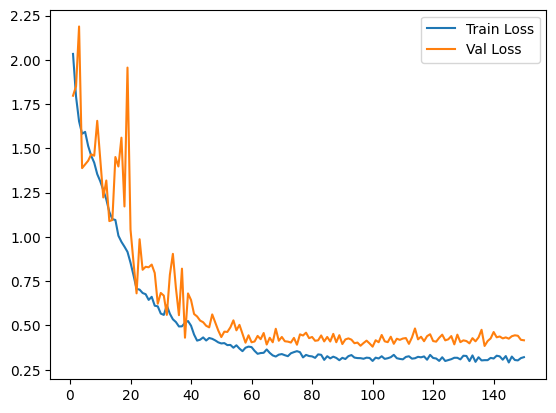

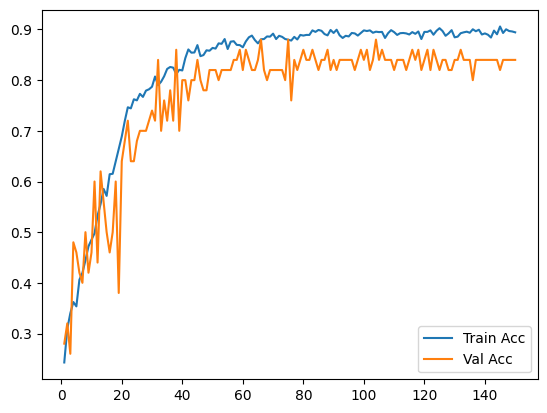

In [33]:
epochs = range(1, len(train_loss_hist) + 1)

plt.figure()
plt.plot(epochs, train_loss_hist, label="Train Loss")
plt.plot(epochs, val_loss_hist, label="Val Loss")
plt.legend()
plt.show()

plt.figure()
plt.plot(epochs, train_acc_hist, label="Train Acc")
plt.plot(epochs, val_acc_hist, label="Val Acc")
plt.legend()
plt.show()


## II. Analyzing a Pre-trained CNN (Filters) (10pt)

In this part, you are going to analyze a (large) pre-trained model. Pre-trained models are quite popular these days, as big companies can train really large models on large datasets (something that personal users can't do as they lack the sufficient hardware). These pre-trained models can be used to fine-tune on other/small datasets or used as components in other tasks (like using a pre-trained classifier for object detection).

All pre-trained models expect input images normalized in the same way, i.e. mini-batches of 3-channel RGB images of shape (3 x H x W), where H and W are expected to be at least 224. The images have to be loaded in to a range of [0, 1] and then normalized using mean = [0.485, 0.456, 0.406] and std = [0.229, 0.224, 0.225].

You can use the following transform to normalize:

`normalize = transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])`
<a href="https://pytorch.org/vision/stable/models.html">Read more here</a>


1. Load a pre-trained VGG16 with PyTorch using `torchvision.models.vgg16(pretrained=True, progress=True, **kwargs)` (<a href="https://pytorch.org/vision/stable/models.html#classification">read more here</a>). Don't forget to use the model in evaluation mode (`model.eval()`).

2. Load the images in the `hw1_data/birds` folder and display them.

3. Pre-process the images to fit VGG16's architecture. What steps did you take?

4. Feed the images (forward pass) to the model. What are the outputs?

5. Choose an image of a dog in the `hw1_data/dogs` folder, display it and feed it to network. What are the outputs?

6. For the first 3 filters in the first layer of VGG16, plot their response (their output) for the image from section 5. Explain what do you see.

## 1. Load a pre-trained VGG16

`VGG16_Weights.DEFAULT` loads ImageNet pre-trained weights and also provides
metadata such as the list of 1000 ImageNet class names.


In [27]:
import torch
from torchvision import transforms
from torchvision.models import vgg16, VGG16_Weights
from PIL import Image
from pathlib import Path
import matplotlib.pyplot as plt

%matplotlib inline

weights = VGG16_Weights.DEFAULT
model = vgg16(weights=weights)
model.eval()  
imagenet_classes = weights.meta["categories"]



## 2. Load the images in the `birds` folder and display them

The project directory contains a folder `birds/` with files.
We read all images from that folder and show them.


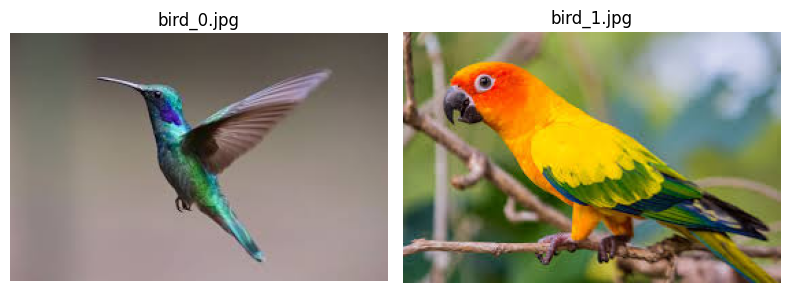

In [28]:
birds_dir = Path("HW1/birds")

bird_paths = sorted([
    p for p in birds_dir.iterdir()
    if p.suffix.lower() in [".jpg", ".jpeg", ".png"]
])

fig, axes = plt.subplots(1, len(bird_paths), figsize=(4 * len(bird_paths), 4))

if len(bird_paths) == 1:
    axes = [axes]

for ax, img_path in zip(axes, bird_paths):
    img = Image.open(img_path).convert("RGB")
    ax.imshow(img)
    ax.set_title(img_path.name)
    ax.axis("off")

plt.tight_layout()
plt.show()


## 3. Pre-process the images to fit VGG16

VGG16 expects:
- 3-channel RGB images,
- of size at least 224×224,
- with pixel values in the range [0, 1],
- normalized channel-wise using:
  - mean = [0.485, 0.456, 0.406]
  - std  = [0.229, 0.224, 0.225]

To achieve this, we apply the following transformation of steps:

1. `Resize(256)` - rescale the image so that the shorter side is 256 pixels.
2. `CenterCrop(224)` - take a 224×224 crop from the center.
3. `ToTensor()` - convert the image to a PyTorch tensor of shape (3, H, W) with values in [0, 1].
4. `Normalize(mean, std)` - normalize each channel using the given mean and std.

We then stack all processed images into a mini-batch of shape (N, 3, 224, 224),
where N is the number of bird images which is 2 in this particular file.


In [29]:
# Define preprocessing transform as defined in the question
normalize = transforms.Normalize(
    mean=[0.485, 0.456, 0.406],
    std=[0.229, 0.224, 0.225]
)

preprocess = transforms.Compose([
    transforms.Resize(256),        # 1. resize short side to 256
    transforms.CenterCrop(224),    # 2. center crop to 224x224
    transforms.ToTensor(),         # 3. convert to tensor [0,1]
    normalize                      # 4. normalize with ImageNet stats
])


bird_tensors = []

for img_path in bird_paths:
    img = Image.open(img_path).convert("RGB")
    x = preprocess(img)
    bird_tensors.append(x)

# Stack into batch: (N, 3, 224, 224)
bird_batch = torch.stack(bird_tensors, dim=0)



## 4. Forward pass for the bird images - outputs

We perform a forward pass through VGG16 using the bird batch.  
The raw network output for each image is a 1000-dimensional vector of **logits**,
one score per ImageNet class.

We then apply `softmax` to obtain a probability distribution over the 1000 classes,
and print the top-5 predictions for each bird image.


In [30]:
with torch.no_grad():
    outputs_birds = model(bird_batch)  # shape: (N, 1000)

print("Raw outputs shape (logits):", outputs_birds.shape)

# Convert logits to probabilities
probs_birds = outputs_birds.softmax(dim=1)  


top5_prob, top5_idx = probs_birds.topk(5, dim=1)

for i, img_path in enumerate(bird_paths):
    print(f"\nImage: {img_path.name}")
    for rank in range(5):
        idx = top5_idx[i, rank].item()
        prob = top5_prob[i, rank].item()
        label = imagenet_classes[idx]
        print(f"  #{rank+1}: {label:30s}  prob={prob:.4f}")


Raw outputs shape (logits): torch.Size([2, 1000])

Image: bird_0.jpg
  #1: hummingbird                     prob=0.8644
  #2: jacamar                         prob=0.1355
  #3: bee eater                       prob=0.0002
  #4: black stork                     prob=0.0000
  #5: water ouzel                     prob=0.0000

Image: bird_1.jpg
  #1: lorikeet                        prob=0.9415
  #2: macaw                           prob=0.0401
  #3: toucan                          prob=0.0108
  #4: bee eater                       prob=0.0029
  #5: goldfinch                       prob=0.0017


## 5. Dog image: display and predictions

Now we choose one image from the `dogs/` folder, apply the same pre-processing,
and run it through the network. Again, we inspect the top-5 predicted classes.

We expect the model to output different dog breeds as its most probable classes.


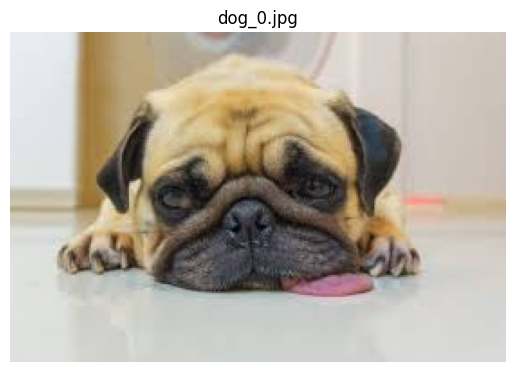

Dog output shape (logits): torch.Size([1, 1000])

Predictions for dog_0.jpg:
  #1: pug                             prob=0.9856
  #2: Brabancon griffon               prob=0.0054
  #3: bull mastiff                    prob=0.0041
  #4: French bulldog                  prob=0.0040
  #5: boxer                           prob=0.0006


In [31]:
dogs_dir = Path("HW1/dogs")
dog_paths = sorted([
    p for p in dogs_dir.iterdir()
    if p.suffix.lower() in [".jpg", ".jpeg", ".png"]
])

# Pick one dog image 
dog_path = dog_paths[0]
dog_img = Image.open(dog_path).convert("RGB")
plt.imshow(dog_img)
plt.title(dog_path.name)
plt.axis("off")
plt.show()

# Preprocess and create batch of size 1
dog_tensor = preprocess(dog_img).unsqueeze(0)  # shape: (1, 3, 224, 224)

# Forward pass
with torch.no_grad():
    outputs_dog = model(dog_tensor)  # shape: (1, 1000)

print("Dog output shape (logits):", outputs_dog.shape)

# Top-5 predictions
probs_dog = outputs_dog.softmax(dim=1)
top5_prob_dog, top5_idx_dog = probs_dog.topk(5, dim=1)

print(f"\nPredictions for {dog_path.name}:")
for rank in range(5):
    idx = top5_idx_dog[0, rank].item()
    prob = top5_prob_dog[0, rank].item()
    label = imagenet_classes[idx]
    print(f"  #{rank+1}: {label:30s}  prob={prob:.4f}")


## 6. First-layer filter responses for the dog image

We now inspect the first convolutional layer of VGG16 (`features[0]`).
It is a `Conv2d` layer with 3 input channels and 64 output channels (64 filters).

We:
1. Feed the pre-processed dog image through this single convolutional layer.
2. Take the output feature maps of the first 3 filters (channels 0, 1, 2).
3. Normalize each feature map for visualization and plot them as grayscale images.

These feature maps show where each filter "fires" on the image.


Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))


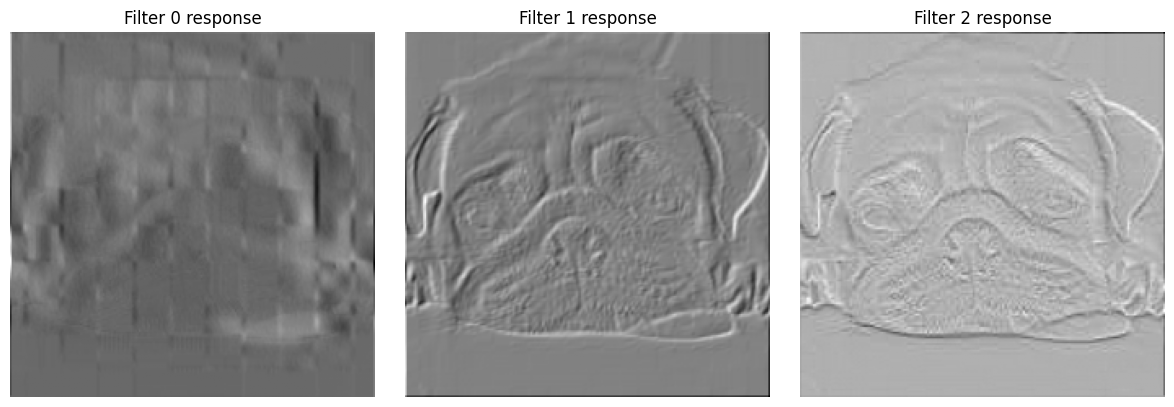

In [32]:
# First conv layer of VGG16
first_conv = model.features[0]
print(first_conv)  


with torch.no_grad():
    first_layer_output = first_conv(dog_tensor) 

activations = first_layer_output[0]
fig, axes = plt.subplots(1, 3, figsize=(12, 4))

for i in range(3):
    act = activations[i].cpu().numpy()

    # Normalize each feature map to [0,1] for visualization
    act_min, act_max = act.min(), act.max()
    act_vis = (act - act_min) / (act_max - act_min + 1e-8)

    axes[i].imshow(act_vis, cmap="gray")
    axes[i].set_title(f"Filter {i} response")
    axes[i].axis("off")

plt.tight_layout()
plt.show()


### Explanation of what we see

Each grayscale image corresponds to the activation map of one convolution filter
for the dog image.

- Bright regions indicate locations where the filter produces a high response,
  meaning the local image pattern matches the filter's preferred pattern.
- Dark regions indicate low response.

Because this is the first convolutional layer, its filters typically learn very
low-level features such as:
- oriented edges (vertical, horizontal, diagonal),
- simple color or intensity contrasts,
- small texture patterns.

We can see that different filters highlight different structures of the dog image:
for example, one filter may respond strongly along the dog’s outline, another may
focus on fur texture, and another may emphasize contrast between the dog and the
background.

These simple feature maps are then combined and transformed by deeper layers
to build up increasingly complex and abstract representations.
